In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

In [2]:
seed = [85387, 167102, 578561, 979676]
series_seed = [12245, 23928, 5905072]
simulations = ['first', 'last']
stimulus = [0, 1, 4]
stimulus_id = [4918, 180160, 227728, 294899, 366797, 408166, 599593, 983115]
# seed = [85387, 167102]
# series_seed = [12245, 23928]
# simulations = ['first', 'last']
# stimulus = [0, 1]
# stimulus_id = [4918, 180160]

n_times = 6
n_neurons = 1000

index = pd.MultiIndex.from_product(
    [seed, series_seed, simulations, stimulus, stimulus_id],
    names=['seed', 'series_seed', 'simulations', 'stimulus', 'stimulus_id']
)

np.random.seed(0)
values = [np.random.rand(n_times * n_neurons).round(1).reshape(n_times, n_neurons) for i in range(len(index))]
raw = pd.Series(values, index=index)
raw

seed    series_seed  simulations  stimulus  stimulus_id
85387   12245        first        0         4918           [[0.5, 0.7, 0.6, 0.5, 0.4, 0.6, 0.4, 0.9, 1.0,...
                                            180160         [[0.4, 0.4, 0.7, 0.6, 0.1, 0.2, 0.1, 0.0, 0.8,...
                                            227728         [[0.6, 0.8, 0.4, 0.5, 0.1, 0.3, 0.9, 0.9, 0.6,...
                                            294899         [[0.8, 0.9, 0.4, 0.3, 0.5, 0.9, 0.1, 0.6, 0.3,...
                                            366797         [[0.2, 0.0, 0.2, 0.5, 0.3, 0.6, 0.9, 0.7, 0.2,...
                                                                                 ...                        
979676  5905072      last         4         294899         [[1.0, 0.9, 0.9, 0.2, 0.3, 0.7, 0.4, 0.1, 0.6,...
                                            366797         [[0.5, 0.8, 0.6, 0.8, 0.1, 0.6, 0.8, 0.6, 0.8,...
                                            408166         [[0.1, 0.2, 0

In [3]:
import simProjectAnalysis as spa
data = spa.ConditionCollection.from_pandas(raw)
for cond in data.conditions():
    print("{0}: {1}".format(cond, data.labels_of(cond)))


seed: [85387, 167102, 578561, 979676]
series_seed: [12245, 23928, 5905072]
simulations: ['first', 'last']
stimulus: [0, 1, 4]
stimulus_id: [4918, 180160, 227728, 294899, 366797, 408166, 599593, 983115]


In [4]:
tmp = data.filter(stimulus=1)
for cond in tmp.conditions():
    print("{0}: {1}".format(cond, tmp.labels_of(cond)))

seed: [85387, 167102, 578561, 979676]
series_seed: [12245, 23928, 5905072]
simulations: ['first', 'last']
stimulus: [1]
stimulus_id: [4918, 180160, 227728, 294899, 366797, 408166, 599593, 983115]


In [5]:
data = data.remove_label("series_seed")
data = data.remove_label("stimulus")
display(data.to_pandas())

seed    simulations  stimulus_id
85387   first        4918           [[0.5, 0.7, 0.6, 0.5, 0.4, 0.6, 0.4, 0.9, 1.0,...
                     180160         [[0.4, 0.4, 0.7, 0.6, 0.1, 0.2, 0.1, 0.0, 0.8,...
                     227728         [[0.6, 0.8, 0.4, 0.5, 0.1, 0.3, 0.9, 0.9, 0.6,...
                     294899         [[0.8, 0.9, 0.4, 0.3, 0.5, 0.9, 0.1, 0.6, 0.3,...
                     366797         [[0.2, 0.0, 0.2, 0.5, 0.3, 0.6, 0.9, 0.7, 0.2,...
                                                          ...                        
979676  last         294899         [[1.0, 0.9, 0.9, 0.2, 0.3, 0.7, 0.4, 0.1, 0.6,...
                     366797         [[0.5, 0.8, 0.6, 0.8, 0.1, 0.6, 0.8, 0.6, 0.8,...
                     408166         [[0.1, 0.2, 0.4, 0.5, 0.2, 1.0, 0.3, 0.9, 0.3,...
                     599593         [[0.1, 0.6, 0.6, 0.8, 0.6, 0.0, 0.9, 0.4, 0.7,...
                     983115         [[0.3, 0.5, 0.2, 0.6, 0.3, 0.5, 0.4, 0.4, 0.2,...
Length: 576, dtype: o

In [6]:
data.get()[0].shape

(6, 1000)

In [7]:
indices = range(200, 300)

def split_into_neurons(in_result):
    for idx in indices:
        yield in_result.res[:, idx], {"neuron_index": idx}

data.unpool(split_into_neurons)
data_unpooled = data

In [8]:
display(data.to_pandas())
display(data.get()[0].shape)


seed    simulations  stimulus_id  neuron_index
85387   first        4918         200             [0.3, 0.3, 0.1, 0.9, 0.6, 0.6]
                                  201             [0.7, 0.9, 0.8, 0.4, 0.3, 0.2]
                                  202             [0.4, 0.9, 0.3, 0.8, 0.2, 0.3]
                                  203             [0.2, 0.9, 0.6, 0.7, 0.7, 0.2]
                                  204             [0.0, 0.7, 0.6, 0.3, 0.2, 0.6]
                                                               ...              
979676  last         983115       295             [0.3, 0.8, 0.6, 0.9, 0.3, 0.7]
                                  296             [0.1, 0.2, 0.3, 0.4, 0.6, 0.5]
                                  297             [0.4, 0.8, 0.9, 0.2, 0.4, 0.4]
                                  298             [0.8, 0.4, 0.2, 0.7, 0.1, 0.4]
                                  299             [0.5, 0.2, 0.8, 0.1, 0.9, 0.8]
Length: 57600, dtype: object

(6,)

NEWLY ADDED CELL: Generate a shuffled control

In [9]:
import hashlib

def calc_hash(tmp):
    tmp = tmp.reorder_levels(sorted(tmp.index.names))
    tmp = tmp.sort_index(kind='stable')
    return hashlib.md5(tmp.to_json(orient="records").encode("utf-8")).hexdigest()

In [10]:
def generate_shuffle_control(stim_id_lst, responses_lst):
#     display(list(zip(stim_id_lst, responses_lst)))
    responses = np.hstack(responses_lst)
    seed = hash(tuple(responses)) % 2 ** 32
    np.random.seed(seed)
    shuffled_responses = np.split(np.random.permutation(responses), len(stim_id_lst))
    for stim_id, shuffled_resp in zip(stim_id_lst, shuffled_responses):
        yield shuffled_resp, {"control_type": "shuffled", "stimulus_id": stim_id}
    for stim_id, resp in zip(stim_id_lst, responses_lst):
        yield resp, {"control_type": "data", "stimulus_id": stim_id}

data = data_unpooled
data = data.transform(["stimulus_id"], generate_shuffle_control, xy=True)


In [11]:
tmp = data.to_pandas()
display(calc_hash(tmp))
display(tmp)

'aa2c834b1c119b88ec197aa0034e6fbe'

simulations  seed    neuron_index  control_type  stimulus_id
first        85387   200           shuffled      4918           [0.5, 0.5, 0.6, 0.6, 1.0, 0.5]
                                                 180160         [0.9, 0.1, 0.7, 0.3, 0.6, 0.2]
                                                 227728         [0.3, 0.1, 0.3, 0.3, 0.0, 0.9]
                                                 294899         [0.2, 0.8, 0.2, 0.2, 0.2, 0.3]
                                                 366797         [0.9, 0.6, 1.0, 0.6, 0.8, 0.7]
                                                                             ...              
last         979676  299           data          294899         [0.0, 0.0, 0.9, 0.0, 0.2, 1.0]
                                                 366797         [0.3, 0.6, 0.2, 0.6, 1.0, 0.7]
                                                 408166         [0.6, 0.6, 0.7, 0.2, 0.1, 0.8]
                                                 599593         [0.6, 0.8, 0.9, 1.0,

In [12]:
mean_response = data.map(np.mean)

In [13]:
from scipy.stats import entropy

def response_entropy(lst_responses):
    return entropy(lst_responses, base=2) / np.log2(len(lst_responses))

response_entropy_stims = mean_response.pool(["stimulus_id"], func=response_entropy)


In [14]:
display(mean_response.to_pandas().sort_index(kind='stable'))
display(response_entropy_stims.to_pandas().sort_index(kind='stable'))
display(calc_hash(mean_response.to_pandas()))
display(calc_hash(response_entropy_stims.to_pandas()))

simulations  seed    neuron_index  control_type  stimulus_id
first        85387   200           data          4918           0.466667
                                                 4918           0.383333
                                                 4918           0.366667
                                                 4918           0.250000
                                                 4918           0.533333
                                                                  ...   
last         979676  299           shuffled      983115         0.366667
                                                 983115         0.333333
                                                 983115         0.633333
                                                 983115         0.383333
                                                 983115         0.516667
Length: 115200, dtype: float64

control_type  simulations  seed    neuron_index
data          first        85387   200             0.993328
                                   201             0.993278
                                   202             0.993513
                                   203             0.994929
                                   204             0.994429
                                                     ...   
shuffled      last         979676  295             0.994013
                                   296             0.992720
                                   297             0.991707
                                   298             0.992602
                                   299             0.993509
Length: 1600, dtype: float64

'59711ab0112f6037c7bb4072e1426bbd'

'94b8d5e391a0980a01bb4421d961f401'

In [15]:
def difference_first_last(lst_str, lst_vals):
    if not "first" in lst_str or not "last" in lst_str:
        return np.NaN
    i = lst_str.index("first")
    j = lst_str.index("last")
    return lst_vals[i] - lst_vals[j]

change_in_response_entropy_stims = response_entropy_stims.pool(["simulations"],
                                                               func=difference_first_last, xy=True)
display(change_in_response_entropy_stims.to_pandas())
display(calc_hash(change_in_response_entropy_stims.to_pandas()))

control_type  seed    neuron_index
data          85387   200             0.000154
                      201             0.000858
                      202            -0.000952
                      203             0.001664
                      204            -0.000155
                                        ...   
shuffled      979676  295            -0.002226
                      296            -0.000617
                      297             0.002866
                      298             0.001224
                      299            -0.000074
Length: 800, dtype: float64

'552dda19592c1e6ee2404b4118760242'

<ErrorbarContainer object of 3 artists>

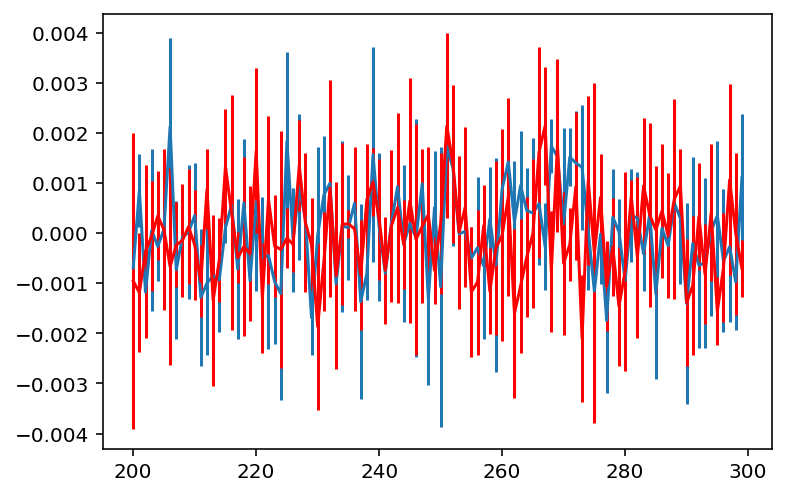

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

change_stims_lst = change_in_response_entropy_stims.pool(["seed"], func=np.array)
change_stims_mn = change_stims_lst.map(np.nanmean)
change_stims_sd = change_stims_lst.map(np.nanstd)

x, mn = change_stims_mn.filter(control_type="data").get_x_y("neuron_index")
sd = change_stims_sd.filter(control_type="data").get()
from matplotlib import pyplot as plt
plt.errorbar(x, mn, yerr=sd)

# Also plot control
x, mn = change_stims_mn.filter(control_type="shuffled").get_x_y("neuron_index")
sd = change_stims_sd.filter(control_type="shuffled").get()
plt.errorbar(x, mn, yerr=sd, color='red')


In [17]:
display(change_stims_lst.to_pandas())
display(calc_hash(change_stims_lst.to_pandas()))

control_type  neuron_index
data          200             [0.00015417871877332345, -0.001247316234976647...
              201             [0.0008581293616072294, 0.0018550078186947427,...
              202             [-0.0009523741859917001, -0.001033924811436937...
              203             [0.001663615014574793, -0.0024897325252221103,...
              204             [-0.00015522858849370547, -0.00086193890976482...
                                                    ...                        
shuffled      295             [-0.002251674625753486, -0.0009347769399579153...
              296             [0.0004792605620280721, -0.0001600143311447643...
              297             [-0.0016360508909645244, 0.0001655839668354142...
              298             [-0.0014640968479927574, 0.0019411072049484446...
              299             [-0.00026122247431092926, -0.00146352802438898...
Length: 200, dtype: object

'b4ed13b6b86eb2fdc586312e1524e45b'

In [18]:
from scipy.stats import ttest_ind

def test_wo_nans(args):
    a, b = args
    return ttest_ind(a[~np.isnan(a)], b[~np.isnan(b)]).pvalue

test_res = change_stims_lst.pool(["control_type"], func=test_wo_nans)
display(test_res.to_pandas())
display(calc_hash(test_res.to_pandas()))
display(test_res.to_pandas().index[:10])

neuron_index
200             0.884248
201             0.044720
202             0.466705
203             0.923124
204             0.384595
                  ...   
295             0.089314
296             0.903055
297             0.376330
298             0.407146
299             0.063207
Length: 100, dtype: float64

'252430ab363328f58e9ddc9ed4ce7b60'

MultiIndex([(200,),
            (201,),
            (202,),
            (203,),
            (204,),
            (205,),
            (206,),
            (207,),
            (208,),
            (209,)],
           names=['neuron_index'])